# Graduate Final Project: Heart Diseas Prediction Model
By: Sania Seyal and Fatima Chowdhury

![heart.jpg](attachment:heart.jpg)

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

Importing data file "heart.csv"

In [2]:
heart = pd.read_csv("heart.csv")

Determining the shape of the data file and printing the first few rows 

In [3]:
print ("shape: ", heart.shape)
heart.head()

shape:  (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Checking to see if there are any nulls in the data 

In [4]:
if heart.isnull().sum().sum() == 0:  # Check if the total number of nulls is 0
    print("Yayyy! No nulls")
else:
    print("There are missing values in the dataset.")


Yayyy! No nulls


Visual demonstration of each attribute showing no nulls

In [5]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

SUMMARY of each attribut in the Data
#count: the number of non-null entried in each column 
#unique: the number of unique vlalues in a column 
#top: the most frequent value in a column 
#freq: the most frequent value in a column
#mean: the avg value of numerical colunmns
#std: the standard deviation which shows how spread out the values are from the mean
#min: minimum value in each column
#25, 50, 75: quartiles which split the data into four equal parts 
#max: maximum value for each column 


In [6]:
print("Summary Statistics:")
print(heart.describe(include='all'))

Summary Statistics:
               Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngin

Visualize the target variable which is whether or not a patient has heart disease

C:\Users\USER\AppData\Local\Temp\ipykernel_35272\3011439375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=heart, palette='viridis')


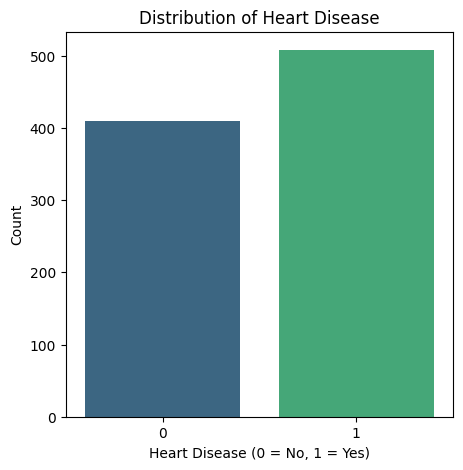

In [7]:
plt.figure(figsize=(5, 5))
sns.countplot(x='HeartDisease', data=heart, palette='viridis')
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Graphical Visualizations of Attribute Comparsion 

C:\Users\USER\AppData\Local\Temp\ipykernel_35272\598442388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=heart, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_35272\598442388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=heart, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_35272\598442388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=heart, palette='viridis')
C:\Users\USER\AppData\Local\Temp\i

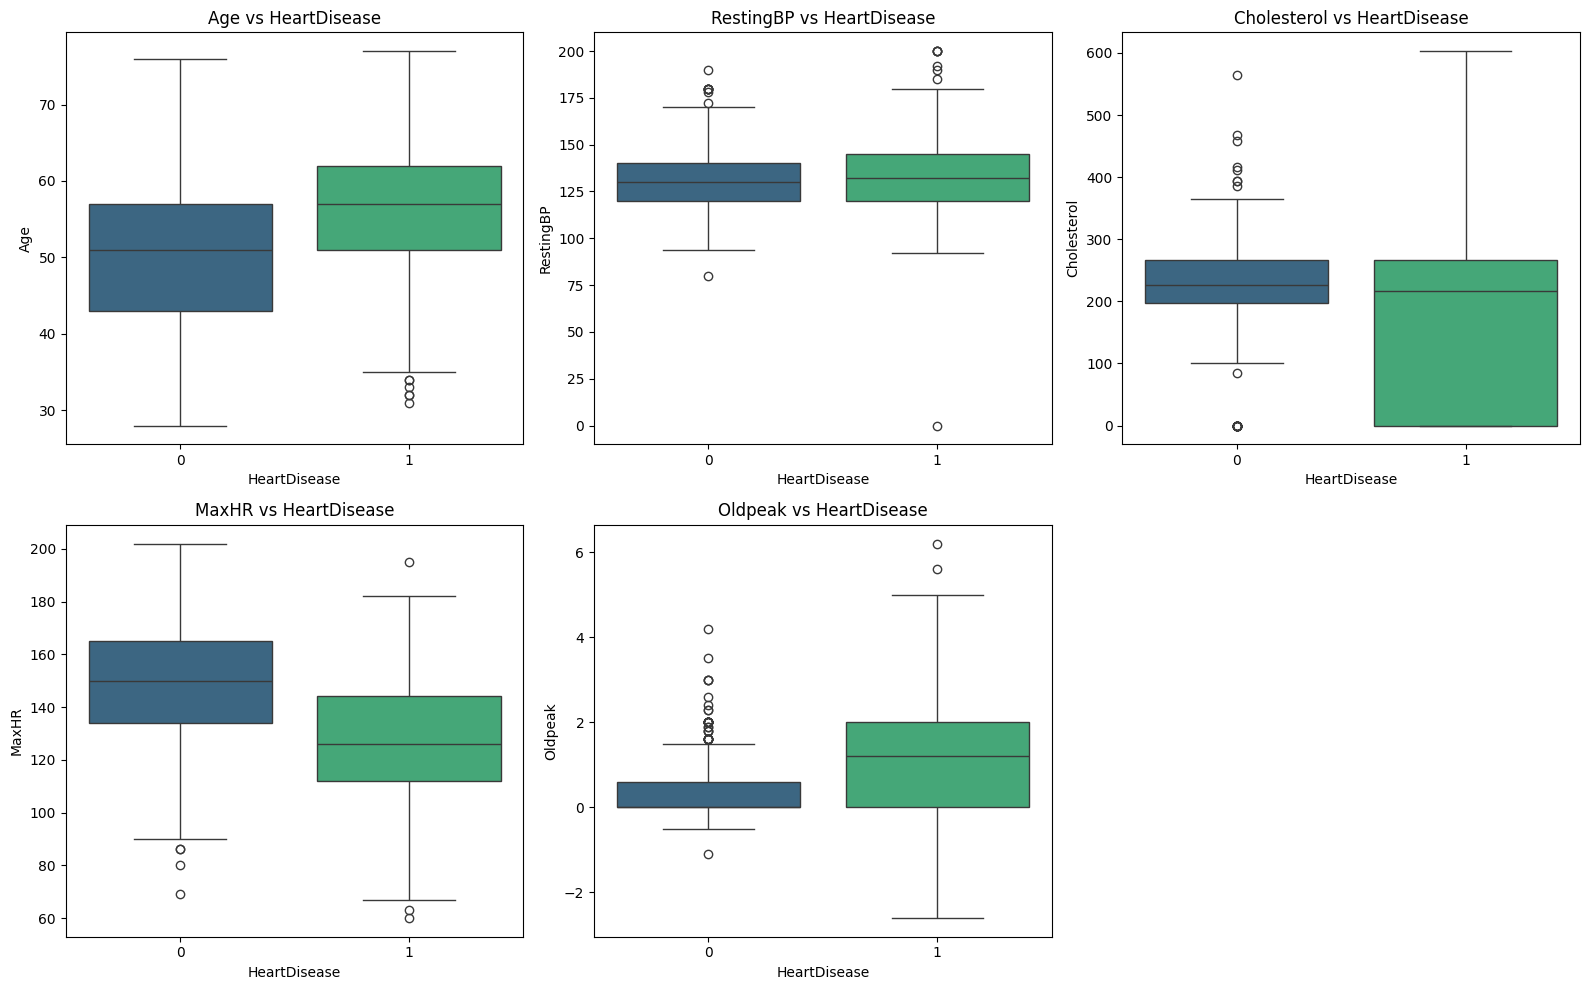

In [8]:
# Numerical features distribution by HeartDisease
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=feature, data=heart, palette='viridis')
    plt.title(f"{feature} vs HeartDisease")
plt.tight_layout()
plt.show()

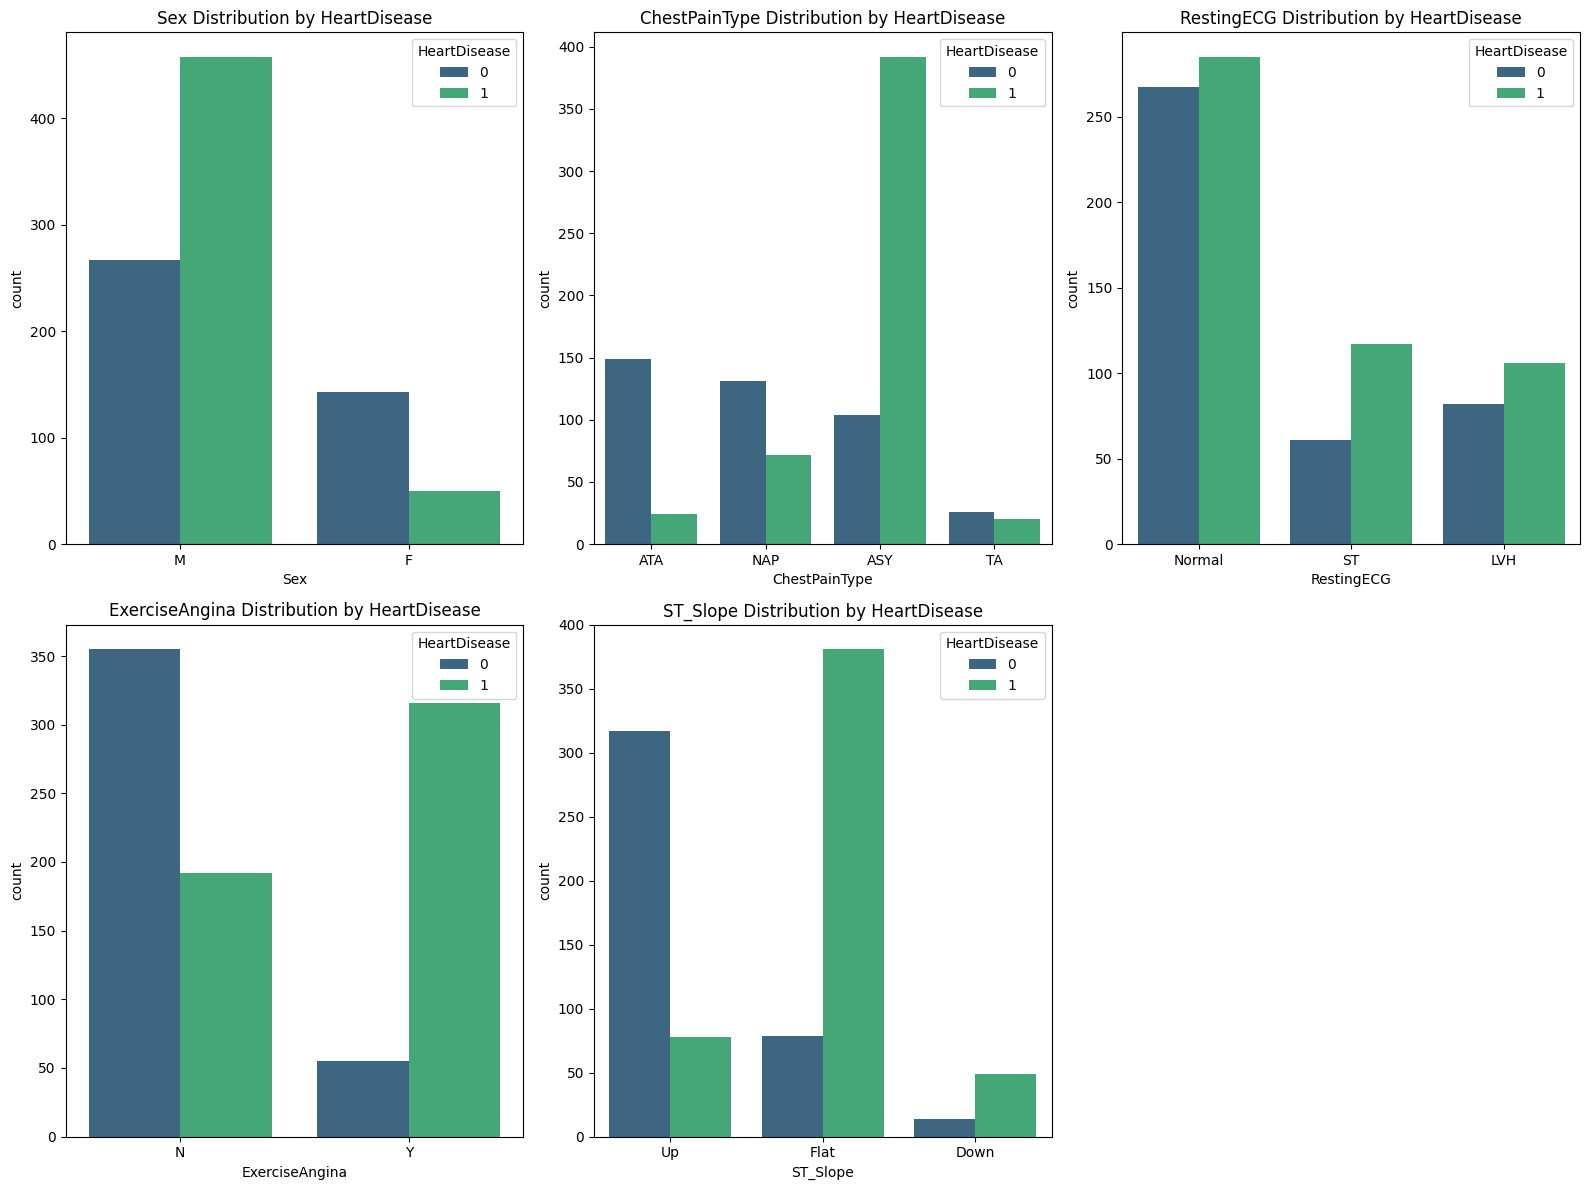

In [9]:
#Categorical features distribution by HeartDisease
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data=heart, palette='viridis')
    plt.title(f"{feature} Distribution by HeartDisease")
    plt.legend(title="HeartDisease", loc='upper right')
plt.tight_layout()
plt.show()


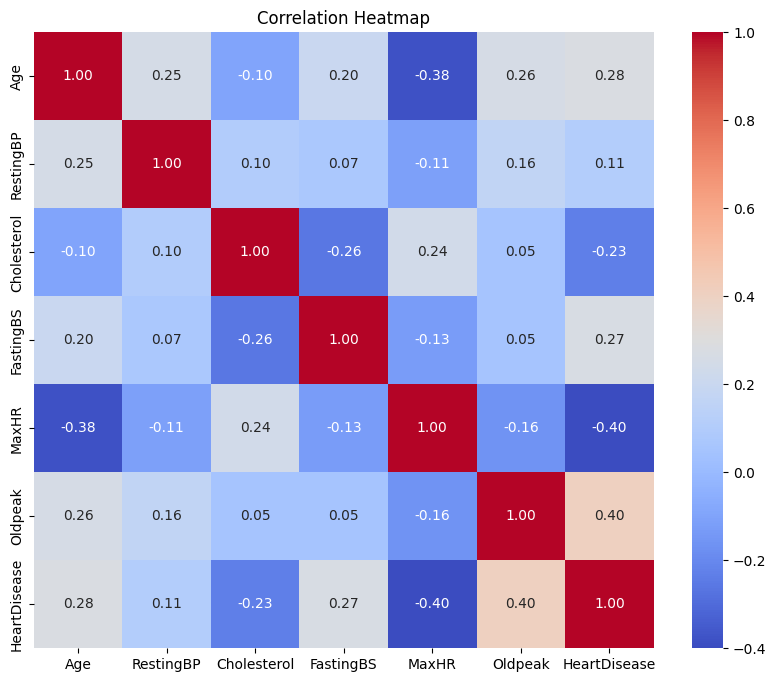

In [10]:
#Heatmap
# Select only numeric columns for correlation
numeric_data = heart.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


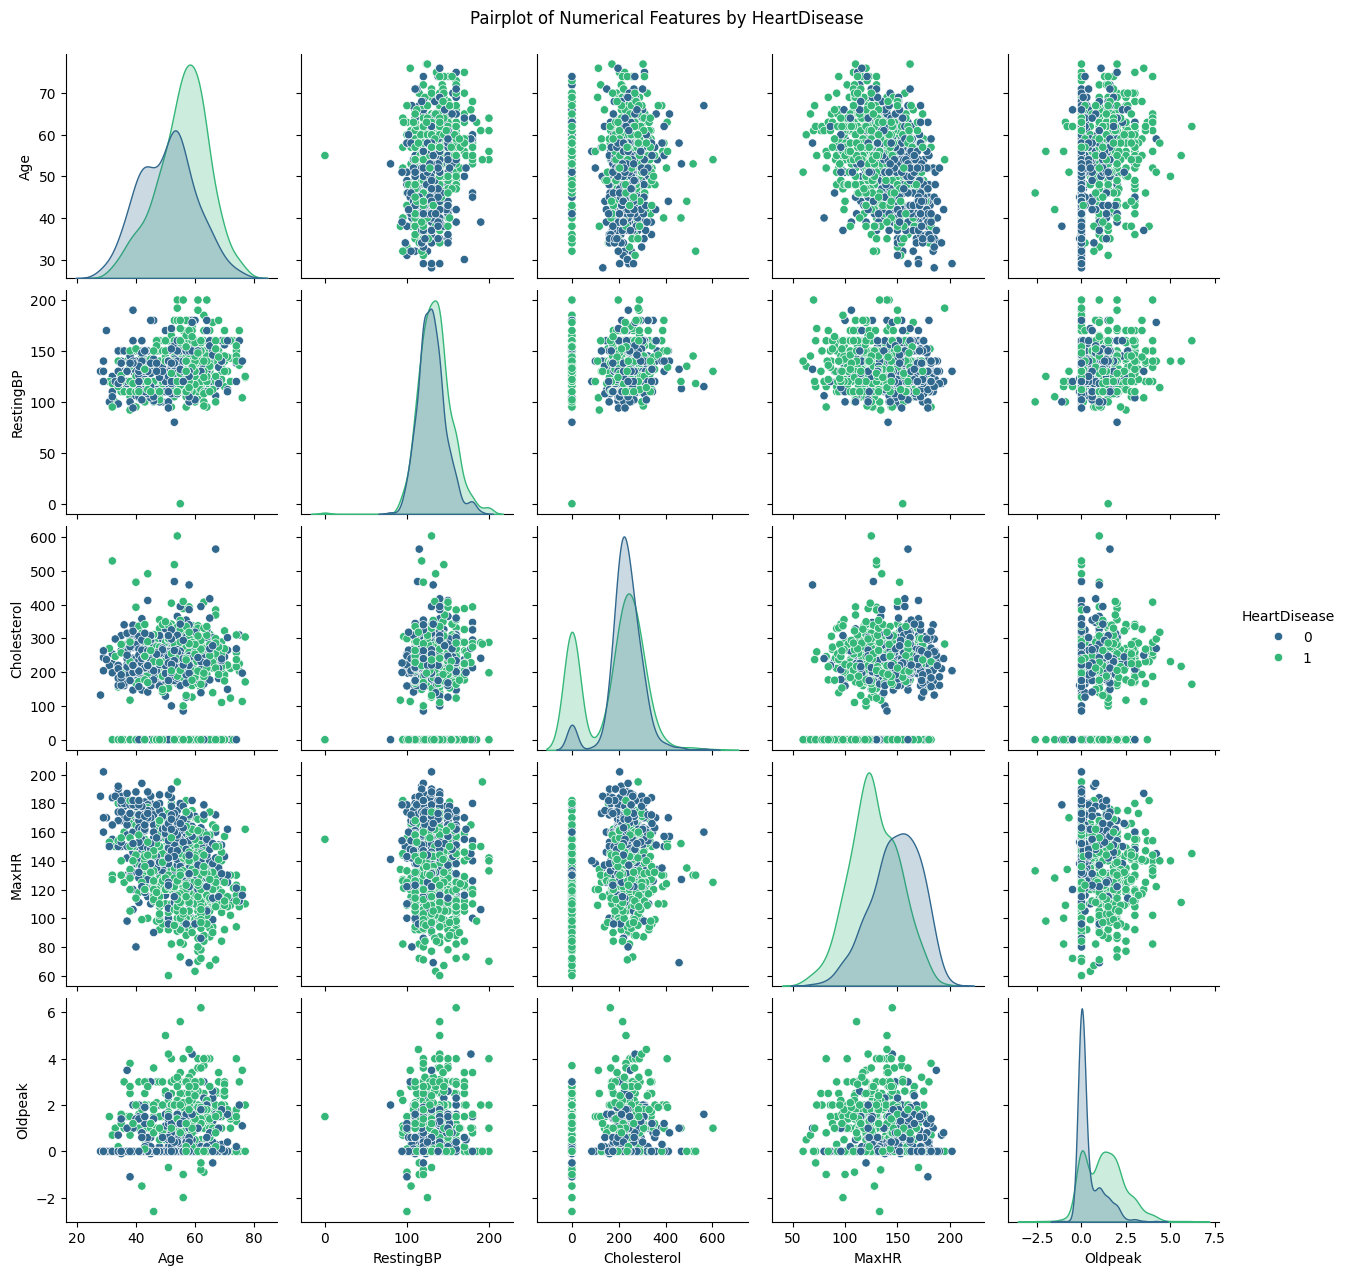

In [11]:
sns.pairplot(heart, vars=numerical_features, hue='HeartDisease', palette='viridis')
plt.suptitle("Pairplot of Numerical Features by HeartDisease", y=1.02)
plt.show()

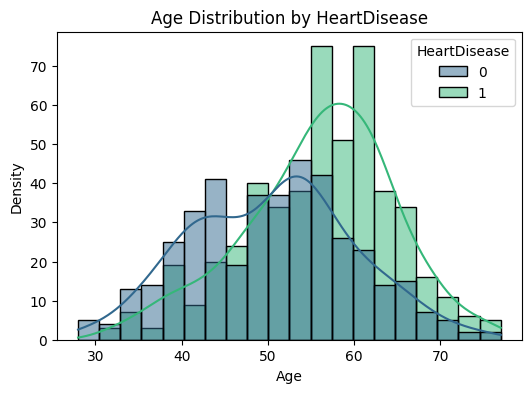

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(data=heart, x='Age', hue='HeartDisease', kde=True, palette='viridis', bins=20)
plt.title("Age Distribution by HeartDisease")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


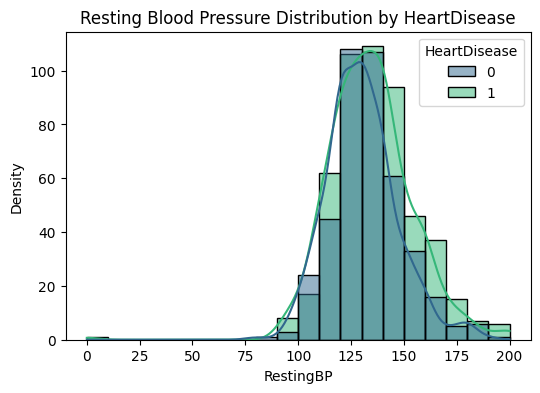

In [13]:
# 7. Resting Blood Pressure (RestingBP) distribution by HeartDisease
plt.figure(figsize=(6, 4))
sns.histplot(data=heart, x='RestingBP', hue='HeartDisease', kde=True, palette='viridis', bins=20)
plt.title("Resting Blood Pressure Distribution by HeartDisease")
plt.xlabel("RestingBP")
plt.ylabel("Density")
plt.show()

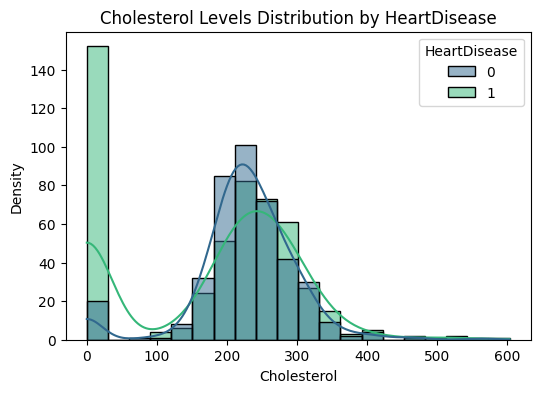

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data=heart, x='Cholesterol', hue='HeartDisease', kde=True, palette='viridis', bins=20)
plt.title("Cholesterol Levels Distribution by HeartDisease")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.show()

In [15]:
# Data Preprocessing
# Encode categorical features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    heart[col] = le.fit_transform(heart[col])
    label_encoders[col] = le

In [16]:
# Standardize numerical features
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
heart[numerical_cols] = scaler.fit_transform(heart[numerical_cols])

In [17]:
# Split the data into features and target
X = heart.drop(columns=['HeartDisease'])
y = heart['HeartDisease']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Model Building
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Logistic Regression Results:

Accuracy: 0.8695652173913043

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        82
           1       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


Key:
Precision: How many of the predicted positive outcomes are actually positive.
Recall: How many of the actual positive outcomes were correctly identified.
F1-Score: A balance between precision and recall.
Support: The number of actual occurrences of each class in the dataset.

Confusion Matrix:
 [[65 17]
 [ 7 95]]


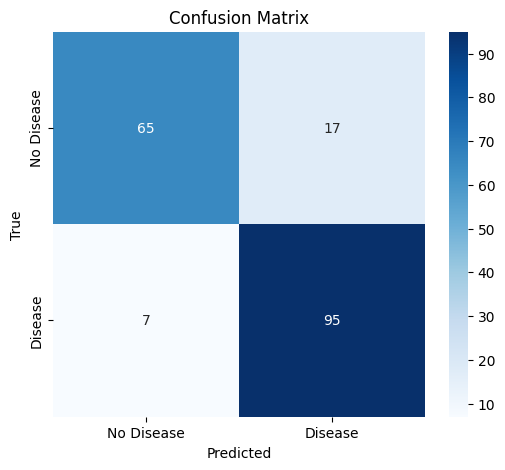

In [21]:
# Model Evaluation
# Logistic Regression Evaluation
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Results:")
print("\nAccuracy:", accuracy_score(y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions))
print("\nKey:")
print("Precision: How many of the predicted positive outcomes are actually positive.")
print("Recall: How many of the actual positive outcomes were correctly identified.")
print("F1-Score: A balance between precision and recall.")
print("Support: The number of actual occurrences of each class in the dataset.")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_predictions))



cm = confusion_matrix(y_test, lr_predictions)  # Compute the confusion matrix

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Random Forest Results:

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184


Key:
Precision: How many of the predicted positive outcomes are actually positive.
Recall: How many of the actual positive outcomes were correctly identified.
F1-Score: A balance between precision and recall.
Support: The number of actual occurrences of each class in the dataset.

Confusion Matrix:
 [[70 12]
 [11 91]]


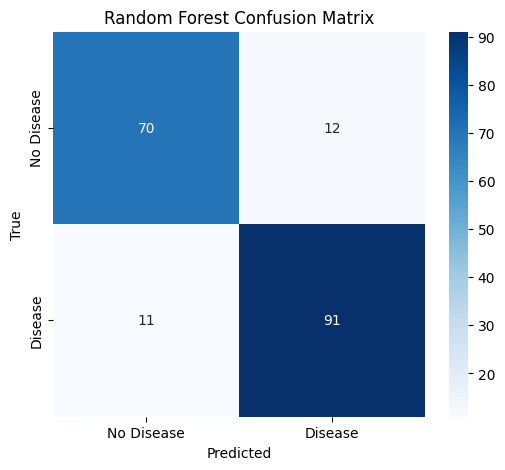

In [22]:
# Model Evaluation
#Random Forrest Evaluation
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print("\nAccuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))
print("\nKey:")
print("Precision: How many of the predicted positive outcomes are actually positive.")
print("Recall: How many of the actual positive outcomes were correctly identified.")
print("F1-Score: A balance between precision and recall.")
print("Support: The number of actual occurrences of each class in the dataset.")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

# Compute the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [23]:
# ROC Curve for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

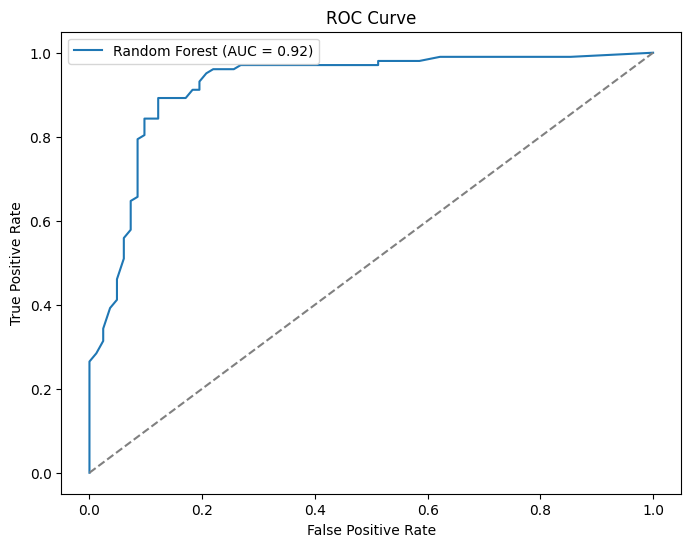

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

# Logistic Regression Predictions
lr_predictions = lr_model.predict(X_test)

# Show predictions and true values for Logistic Regression
lr_results = pd.DataFrame({
    'True Value': y_test,
    'Predicted Value': lr_predictions
})

# Calculate and print accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Predictions:")
print(lr_results)
print(f"Accuracy: {lr_accuracy:.2f}")

# Random Forest Predictions
rf_predictions = rf_model.predict(X_test)

# Show predictions and true values for Random Forest
rf_results = pd.DataFrame({
    'True Value': y_test,
    'Predicted Value': rf_predictions
})

# Calculate and print accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Predictions:")
print(rf_results)
print(f"Accuracy: {rf_accuracy:.2f}")


print("")


explanation = """
The row numbers in the output are not in order because the data was taken from a larger dataset and split into training and testing sets. When we split the data, the original row numbers (or index) from the dataset were kept. So, the row numbers you see in the output correspond to the original positions of the data points in the full dataset, not in the order they appear in the test set.

In other words, the row numbers are just the indices of the test data from the original dataset. This is why the numbers might seem out of order, as the data was shuffled or split randomly.
"""

# Print the explanation
print(explanation)


Logistic Regression Predictions:
     True Value  Predicted Value
356           1                1
763           1                0
817           1                1
735           1                1
892           0                0
..          ...              ...
52            0                0
752           1                1
492           1                1
622           1                1
316           1                1

[184 rows x 2 columns]
Accuracy: 0.87

Random Forest Predictions:
     True Value  Predicted Value
356           1                1
763           1                0
817           1                1
735           1                1
892           0                0
..          ...              ...
52            0                0
752           1                1
492           1                1
622           1                1
316           1                1

[184 rows x 2 columns]
Accuracy: 0.88


The row numbers in the output are not in order because the data was

In [26]:
import joblib

# Save the Random Forest model as it's performing better
joblib.dump(rf_model, 'heart_disease_model.pkl')

# Instructions for using the model
print("The model has been saved as 'heart_disease_model.pkl'. Load it using joblib.load() for predictions.")

The model has been saved as 'heart_disease_model.pkl'. Load it using joblib.load() for predictions.


In [27]:
import joblib
model = joblib.load('heart_disease_model.pkl')
print("Model loaded successfully")

Model loaded successfully
